In [2]:
include("TheroFunc.jl")
include("constants.jl")
include("Tools.jl")
include("Functions_Quark.jl")
include("Phase_Diagram.jl")

using Plots
using DataFrames
using CSV
using LaTeXStrings

In [37]:
Ts = 1.0:1.0:300.0
mus = [0.0, 100.0*3, 150.0*3, 200.0*3, 250.0*3, 291.0*3]

int1, int2 = get_nodes(128)
int_same1 = int_same(int1)
int_same2 = int_same(int2)
ints = [int1, int2, int_same1, int_same2]

lens = length(Ts) * length(mus)
mydata = zeros(lens, 7)

i=1
for mu = mus
    X0 = [-1.8, -1.8, -2.2, 0.0038, 0.0038]
    for T = Ts
        NewX = Tmu(T, mu, X0, ints)
        phi = NewX[1:3]
        Phi1 = NewX[4]
        Phi2 = NewX[5]
        mydata[i,:] = [T, mu, phi[1], phi[2], phi[3], Phi1, Phi2]
        X0 = NewX
        i = i + 1
    end
end


[0.0, 300.0, 450.0, 600.0, 750.0, 873.0]


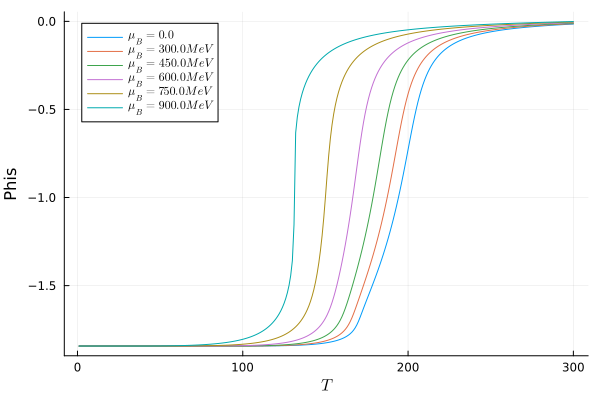

In [38]:
data = DataFrame(mydata, [:T, :mu_B, :phi1, :phi2, :phi3, :Phi1, :Phi2])
mu_Bs = unique(data.mu_B)
println(mu_Bs)
mu_data1 = filter(row -> row.mu_B == mu_Bs[1], data)
mu_data2 = filter(row -> row.mu_B == mu_Bs[2], data)
mu_data3 = filter(row -> row.mu_B == mu_Bs[3], data)
mu_data4 = filter(row -> row.mu_B == mu_Bs[4], data)
mu_data5 = filter(row -> row.mu_B == mu_Bs[5], data)
mu_data6 = filter(row -> row.mu_B == mu_Bs[6], data)

Ts_mu0 = mu_data1.T 
phi_u1 = mu_data1.phi1
phi_u2 = mu_data2.phi1
phi_u3 = mu_data3.phi1
phi_u4 = mu_data4.phi1
phi_u5 = mu_data5.phi1
phi_u6 = mu_data6.phi1

dphi11dT = dAdB(Ts_mu0, phi_u1)
dphi12dT = dAdB(Ts_mu0, phi_u2)
dphi13dT = dAdB(Ts_mu0, phi_u3)
dphi14dT = dAdB(Ts_mu0, phi_u4)
dphi15dT = dAdB(Ts_mu0, phi_u5)
dphi16dT = dAdB(Ts_mu0, phi_u6)





plot(
    xlabel=L"T",
    ylabel="Phis",
)   
plot!(Ts_mu0, phi_u1, label=L"\mu_B = 0.0")
plot!(Ts_mu0, phi_u2, label=L"\mu_B = 300.0 MeV")
plot!(Ts_mu0, phi_u3, label=L"\mu_B = 450.0 MeV")
plot!(Ts_mu0, phi_u4, label=L"\mu_B = 600.0 MeV")
plot!(Ts_mu0, phi_u5, label=L"\mu_B = 750.0 MeV")
plot!(Ts_mu0, phi_u6, label=L"\mu_B = 900.0 MeV")



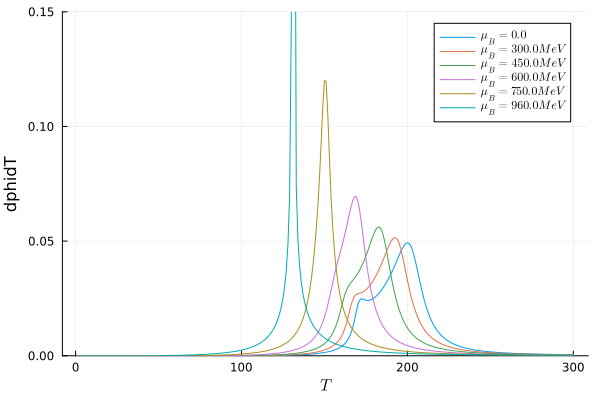

In [41]:
plot(
    xlabel=L"T",
    ylabel="dphidT",
    ylim=(0.0,0.15)
) 
max_val, max_idx = findmax(dphi16dT)  # 返回 (最大值, 索引)
plot!(Ts_mu0, dphi11dT, label=L"\mu_B = 0.0")
plot!(Ts_mu0, dphi12dT, label=L"\mu_B = 300.0 MeV")
plot!(Ts_mu0, dphi13dT, label=L"\mu_B = 450.0 MeV")
plot!(Ts_mu0, dphi14dT, label=L"\mu_B = 600.0 MeV")
plot!(Ts_mu0, dphi15dT, label=L"\mu_B = 750.0 MeV")
plot!(Ts_mu0, dphi16dT, label=L"\mu_B = 960.0 MeV")


In [ ]:
int1, int2 = get_nodes(256)
int_same1 = int_same(int1)
int_same2 = int_same(int2)
ints = [int1, int2, int_same1, int_same2]

In [51]:
T = 101.0
rhoB_s = 0.01:0.01:3.00

X0 = [-1.8, -1.8, -2.2, 0.8,0.8, 320/hc, 320/hc,320/hc]

my_data = zeros(length(rhoB_s), 4)

for (i, rhoB) in enumerate(rhoB_s)
    NewX = Trho(T, rhoB, X0, ints)
    mu_B = NewX[6] * 3
    phi = NewX[1:3]
    Phi1 = NewX[4]
    Phi2 = NewX[5]
    P = -Omega(phi, Phi1, Phi2, T/hc, mu_B, ints)
    my_data[i, :] = [T, rhoB, mu_B*hc, P]
    X0 = NewX
end
data = DataFrame(my_data, [:T, :rho_B, :mu_B, :P])


Row,T,rho_B,mu_B,P
,Float64,Float64,Float64,Float64
1,101.0,0.01,655.829,21.6076
2,101.0,0.02,724.643,21.6084
3,101.0,0.03,764.401,21.6092
4,101.0,0.04,792.264,21.61
5,101.0,0.05,813.609,21.6107
6,101.0,0.06,830.831,21.6115
7,101.0,0.07,845.208,21.6123
8,101.0,0.08,857.502,21.613
9,101.0,0.09,868.206,21.6137


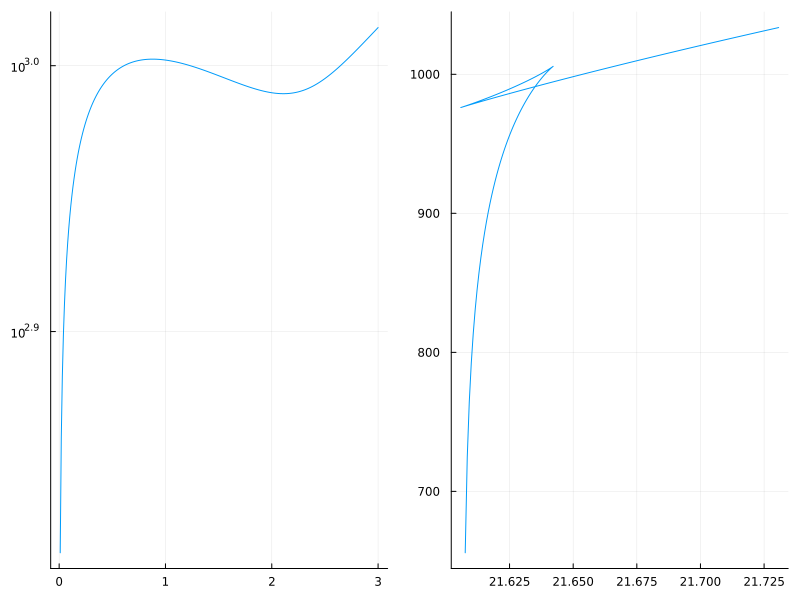

In [52]:
rho = data.rho_B
mu_B = data.mu_B
P = data.P
# 绘制一列两行子图
plot(
    plot(rho,mu_B,yscale=:log10),
    plot(P,mu_B),
    layout = (1,2),  # 2行1列
    legend = false,
    size = (800, 600)  # 调整画布大小
)


In [1]:
using BenchmarkTools

In [4]:
T = 100.0/hc
mu_B = 0.0

int1, int2 = get_nodes(128)
int_same1 = int_same(int1)
int_same2 = int_same(int2)
ints = [int1, int2, int_same1, int_same2]
X0 = [-1.8, -1.8, -2.2, 0.0038, 0.0038]
@benchmark res = NewQuark_mu(X0, T, mu_B, ints)


BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  115.900 μs …  22.991 ms  ┊ GC (min … max):  0.00% … 99.14%
 Time  (median):     141.800 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   186.179 μs ± 394.147 μs  ┊ GC (mean ± σ):  10.01% ±  7.17%

  ▁██▆▁                                                          
  █████▅▆▆▅▄▄▄▄▃▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂ ▃
  116 μs           Histogram: frequency by time          515 μs <

 Memory estimate: 170.79 KiB, allocs estimate: 514.